In [207]:
import pandas as pd 
import matplotlib.pyplot as plt
from plotnine import*
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns
import re
import numpy as np

In [208]:
from matplotlib import font_manager,rc
font_f = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family='font_f')

In [209]:
apt = pd.read_csv("C:/Users/Lee Jong Ann/Downloads/전국_평균_분양가격_2018.7월_.csv",encoding='cp949')

In [210]:
print(apt.columns)

Index(['지역명', '규모구분', '연도', '월', '분양가격(㎡)'], dtype='object')


In [211]:
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 5 columns):
지역명        2890 non-null object
규모구분       2890 non-null object
연도         2890 non-null int64
월          2890 non-null int64
분양가격(㎡)    2750 non-null object
dtypes: int64(2), object(3)
memory usage: 113.0+ KB


In [212]:
apt['연도'] = apt['연도'].astype(str)
apt['월'] = apt['월'].astype(str)
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 5 columns):
지역명        2890 non-null object
규모구분       2890 non-null object
연도         2890 non-null object
월          2890 non-null object
분양가격(㎡)    2750 non-null object
dtypes: object(5)
memory usage: 113.0+ KB


In [213]:
apt_price = apt['분양가격(㎡)']
apt['분양가격'] = pd.to_numeric(apt_price,errors='coerce')
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 6 columns):
지역명        2890 non-null object
규모구분       2890 non-null object
연도         2890 non-null object
월          2890 non-null object
분양가격(㎡)    2750 non-null object
분양가격       2658 non-null float64
dtypes: float64(1), object(5)
memory usage: 135.6+ KB


In [214]:
apt['평당분양가격'] = apt['분양가격']*3.3

In [215]:
region_year_all = apt.loc[apt['규모구분'] == '전체']

In [216]:
from matplotlib import font_manager,rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)
%matplotlib inline

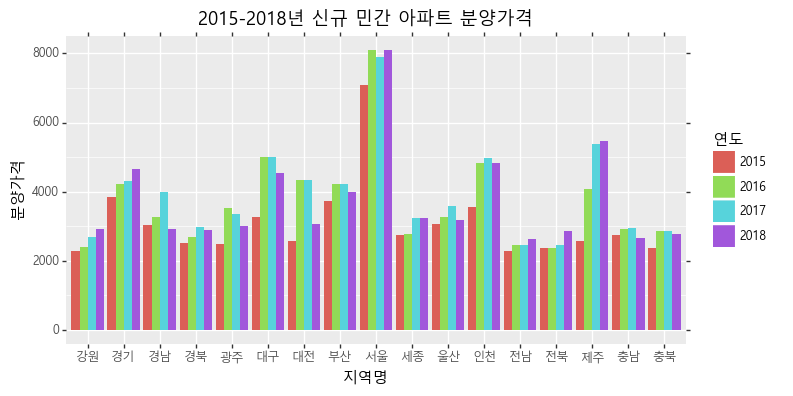

<ggplot: (-9223371869625871688)>

In [217]:
(ggplot(apt, aes(x='지역명',y='분양가격',fill='연도'))
       +geom_bar(stat='identity',position='dodge')
       + ggtitle('2015-2018년 신규 민간 아파트 분양가격')
       + theme(text=element_text(family=font_name),
        figure_size=(8, 4))
       )

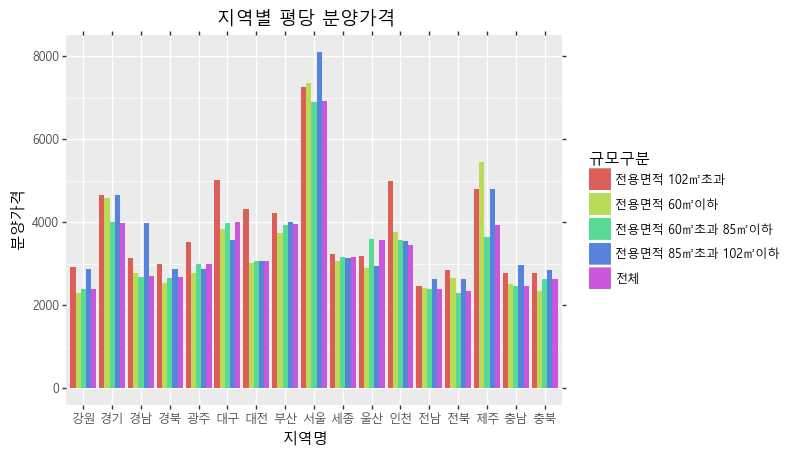

<ggplot: (-9223371869625822440)>

In [218]:
(ggplot(apt,aes(x='지역명',y='분양가격',fill='규모구분'))
    +geom_bar(stat = 'identity',position='dodge')
    +ggtitle('지역별 평당 분양가격')
    +theme(text=element_text(family=font_name)))


In [219]:
apt.columns

Index(['지역명', '규모구분', '연도', '월', '분양가격(㎡)', '분양가격', '평당분양가격'], dtype='object')

In [220]:
apt_2017 = apt.loc[apt['연도'] == '2017']

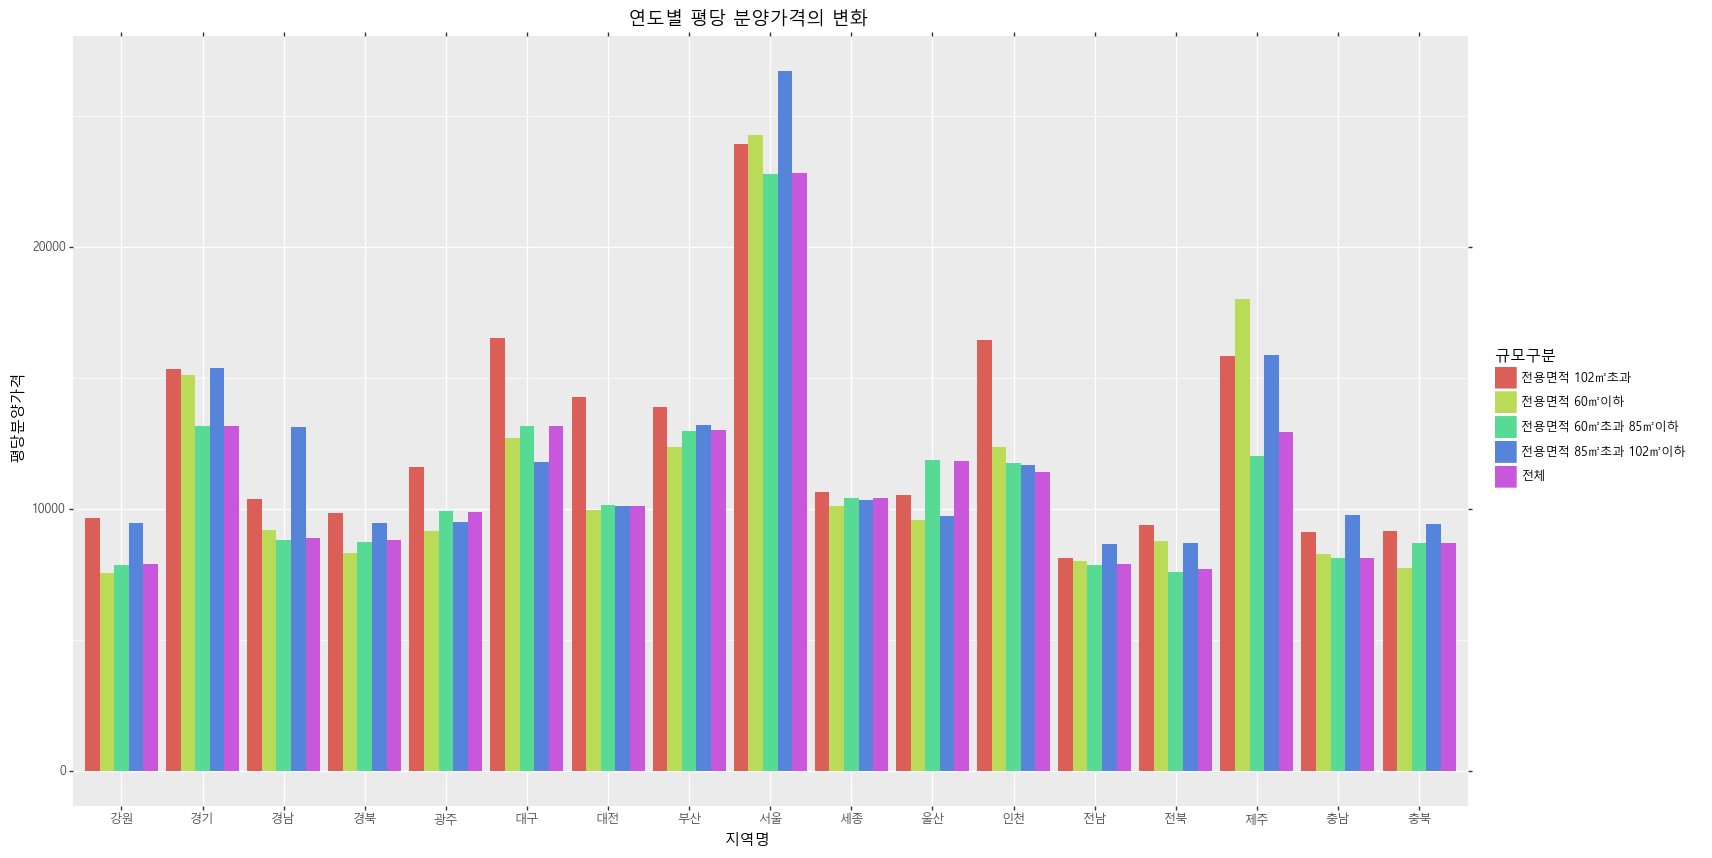

<ggplot: (-9223371869625789152)>

In [221]:
(ggplot(apt,aes(x='지역명',y='평당분양가격',fill='규모구분'))
    +geom_bar(stat='identity',position='dodge')
    +ggtitle('연도별 평당 분양가격의 변화')
    +theme(text=element_text(family=font_name)
           ,figure_size=(18,10)
    ))


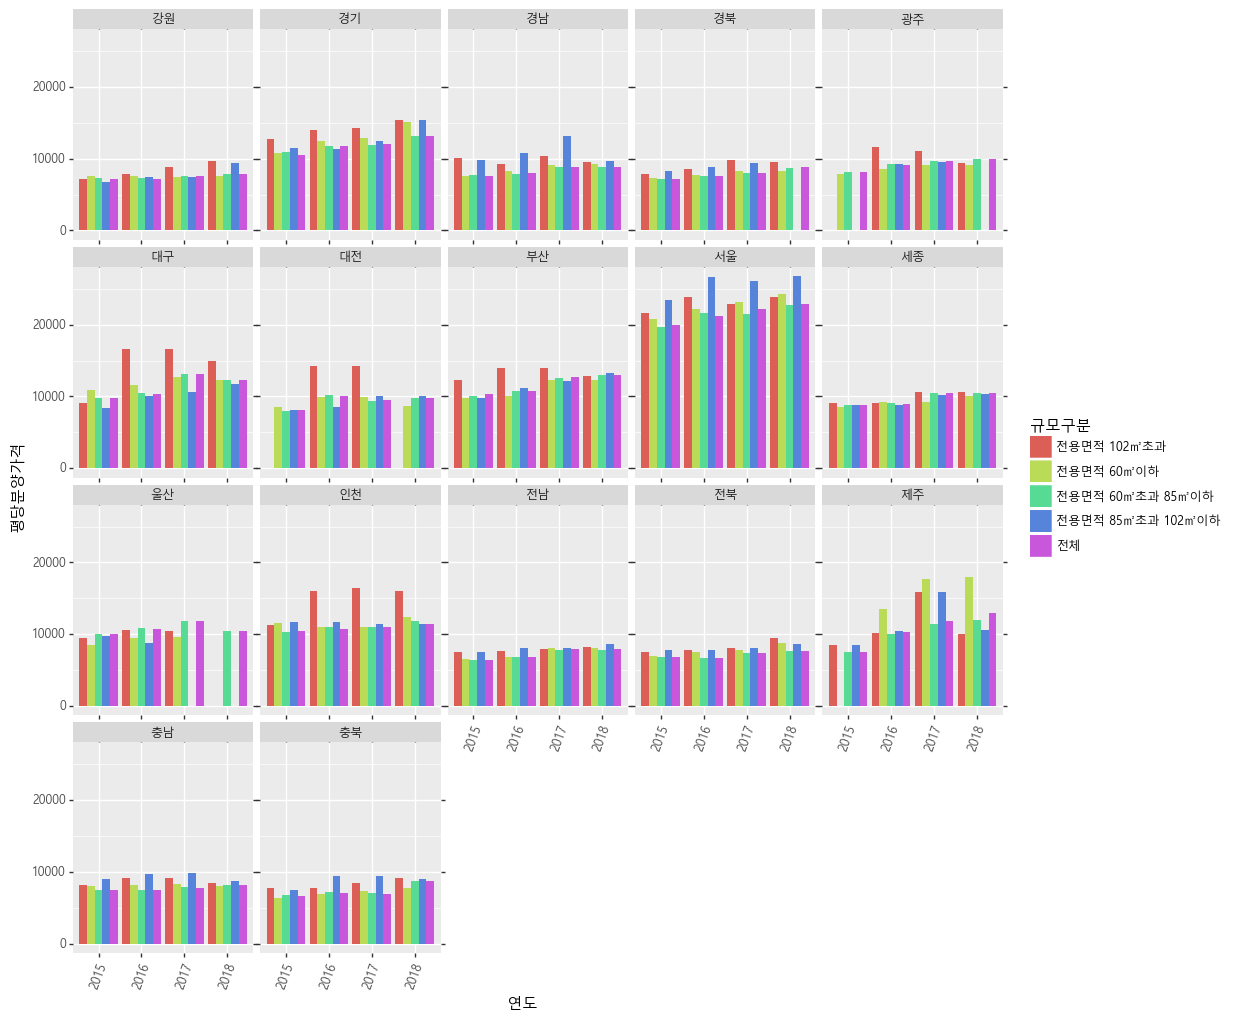

<ggplot: (-9223371869624546872)>

In [222]:
(ggplot(apt)
    +aes(x='연도',y='평당분양가격',fill = '규모구분')
    +geom_bar(stat='identity',position='dodge')
    +facet_wrap('지역명')
    +theme(text=element_text(family=font_name),
          axis_text_x=element_text(rotation=70),
          figure_size=(12,12)))

In [223]:
df = pd.read_csv("C:/Users/Lee Jong Ann/Downloads/지역별_3.3㎡당_평균_분양가격_천원__15.09월.csv",skiprows=1,header=0,encoding='euc-kr')
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,구분,NaN,2013년,2014년,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(단위: 천원/3.3㎡)
1,시도,시군구,12월,1월,2월,3월,4월,5월,6월,7월,...,3월,4월,5월,6월,7월,8월,9월,전월비,전년말비,전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
5,NaN,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360",...,"8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
6,NaN,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974",...,"9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131
7,NaN,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612",...,"7,861","7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281
8,NaN,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333",...,"8,067","8,145","8,272","8,079","8,079","8,079","7,917",68,610,414
9,NaN,울산,"8,090","8,090","8,090","8,153","8,153","8,153","8,153","8,153",...,"8,629","9,380","9,192","9,190","9,190","9,215","9,215",0,324,722


In [224]:
year = df.iloc[0]
month = df.iloc[1]

In [225]:
for i ,y in enumerate(year):
    if i>2 and i<15:
        year[i] = ' '.join(['2014년',month[i]])
    elif i >= 15: 
        year[i] = ' '.join(['2015년',month[i]])
    elif i == 2: 
        year[i] = ' '.join([year[i],month[i]])
    elif i == 1:
        year[i] = '시군구'
print(year)

Unnamed: 0              구분
Unnamed: 1             시군구
Unnamed: 2       2013년 12월
Unnamed: 3        2014년 1월
Unnamed: 4        2014년 2월
Unnamed: 5        2014년 3월
Unnamed: 6        2014년 4월
Unnamed: 7        2014년 5월
Unnamed: 8        2014년 6월
Unnamed: 9        2014년 7월
Unnamed: 10       2014년 8월
Unnamed: 11       2014년 9월
Unnamed: 12      2014년 10월
Unnamed: 13      2014년 11월
Unnamed: 14      2014년 12월
Unnamed: 15       2015년 1월
Unnamed: 16       2015년 2월
Unnamed: 17       2015년 3월
Unnamed: 18       2015년 4월
Unnamed: 19       2015년 5월
Unnamed: 20       2015년 6월
Unnamed: 21       2015년 7월
Unnamed: 22       2015년 8월
Unnamed: 23       2015년 9월
Unnamed: 24      2015년 전월비
Unnamed: 25     2015년 전년말비
Unnamed: 26    2015년 전년동월비
Name: 0, dtype: object


In [226]:
df.columns = year

In [227]:
df

,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,...,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비
0,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,...,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비
1,시도,시군구,12월,1월,2월,3월,4월,5월,6월,7월,...,3월,4월,5월,6월,7월,8월,9월,전월비,전년말비,전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
5,NaN,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360",...,"8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
6,NaN,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974",...,"9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131
7,NaN,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612",...,"7,861","7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281
8,NaN,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333",...,"8,067","8,145","8,272","8,079","8,079","8,079","7,917",68,610,414
9,NaN,울산,"8,090","8,090","8,090","8,153","8,153","8,153","8,153","8,153",...,"8,629","9,380","9,192","9,190","9,190","9,215","9,215",0,324,722


In [228]:
df = df.drop(df.index[[0,1]])

In [229]:
df

,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,...,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
5,NaN,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360",...,"8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
6,NaN,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974",...,"9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131
7,NaN,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612",...,"7,861","7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281
8,NaN,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333",...,"8,067","8,145","8,272","8,079","8,079","8,079","7,917",68,610,414
9,NaN,울산,"8,090","8,090","8,090","8,153","8,153","8,153","8,153","8,153",...,"8,629","9,380","9,192","9,190","9,190","9,215","9,215",0,324,722
10,NaN,NaN,"8,151","8,355","8,597","8,552","8,585","8,606","8,669","8,648",...,"8,692","8,858","8,967","8,942","8,984","9,058","9,023",-36,325,352
11,경기,NaN,"10,855","10,855","10,791","10,784","10,876","10,646","10,266","10,124",...,"10,469","10,684","10,685","10,573","10,518","10,573","10,341",-232,-38,-160


In [230]:
df['구분'] = df['구분'].fillna('')
df['시군구'] = df['시군구'].fillna('')

In [231]:
df['지역'] = df['구분'] + df['시군구']

In [232]:
melt_columns = df.columns.copy()
melt_columns

Index(['구분', '시군구', '2013년 12월', '2014년 1월', '2014년 2월', '2014년 3월',
       '2014년 4월', '2014년 5월', '2014년 6월', '2014년 7월', '2014년 8월', '2014년 9월',
       '2014년 10월', '2014년 11월', '2014년 12월', '2015년 1월', '2015년 2월',
       '2015년 3월', '2015년 4월', '2015년 5월', '2015년 6월', '2015년 7월', '2015년 8월',
       '2015년 9월', '2015년 전월비', '2015년 전년말비', '2015년 전년동월비', '지역'],
      dtype='object', name=0)

In [233]:

df_2013_2015 = pd.melt(df, id_vars=['지역'], value_vars=['2013년 12월', '2014년 1월', '2014년 2월', '2014년 3월',
       '2014년 4월', '2014년 5월', '2014년 6월', '2014년 7월', '2014년 8월',
       '2014년 9월', '2014년 10월', '2014년 11월', '2014년 12월', '2015년 1월',
       '2015년 2월', '2015년 3월', '2015년 4월', '2015년 5월', '2015년 6월',
       '2015년 7월', '2015년 8월', '2015년 9월'])
df_2013_2015.head()

,지역,0,value
0,전국,2013년 12월,"8,059"
1,서울,2013년 12월,"18,189"
2,6대광역시부산,2013년 12월,"8,111"
3,대구,2013년 12월,"8,080"
4,인천,2013년 12월,"10,204"


In [234]:
df_2013_2015.columns = ['지역', '기간', '분양가']
df_2013_2015.head()

,지역,기간,분양가
0,전국,2013년 12월,"8,059"
1,서울,2013년 12월,"18,189"
2,6대광역시부산,2013년 12월,"8,111"
3,대구,2013년 12월,"8,080"
4,인천,2013년 12월,"10,204"


In [235]:
df_2013_2015['연도'] = df_2013_2015['기간'].apply(lambda year_month : year_month.split('년')[0])

In [236]:
df_2013_2015['월'] = df_2013_2015['기간'].apply(lambda year_month: re.sub('월','',year_month.split('월')[1]).strip())

In [237]:
df_2013_2015.head()

,지역,기간,분양가,연도,월
0,전국,2013년 12월,"8,059",2013,
1,서울,2013년 12월,"18,189",2013,
2,6대광역시부산,2013년 12월,"8,111",2013,
3,대구,2013년 12월,"8,080",2013,
4,인천,2013년 12월,"10,204",2013,


In [238]:
df_2013_2015['지역'] = df_2013_2015['지역'].apply(lambda x: re.sub('6대광역시부산','부산', x))
df_2013_2015['지역'] = df_2013_2015['지역'].apply(lambda x: re.sub('지방강원','강원', x))

df_2013_2015.tail()

,지역,기간,분양가,연도,월
457,전남,2015년 9월,"6,245",2015,
458,경북,2015년 9월,"7,029",2015,
459,경남,2015년 9월,"7,947",2015,
460,제주,2015년 9월,"7,379",2015,
461,,2015년 9월,"7,019",2015,


In [239]:
df_2013_2015['분양가격'] = df_2013_2015['분양가'].str.replace(',', '').astype(int)

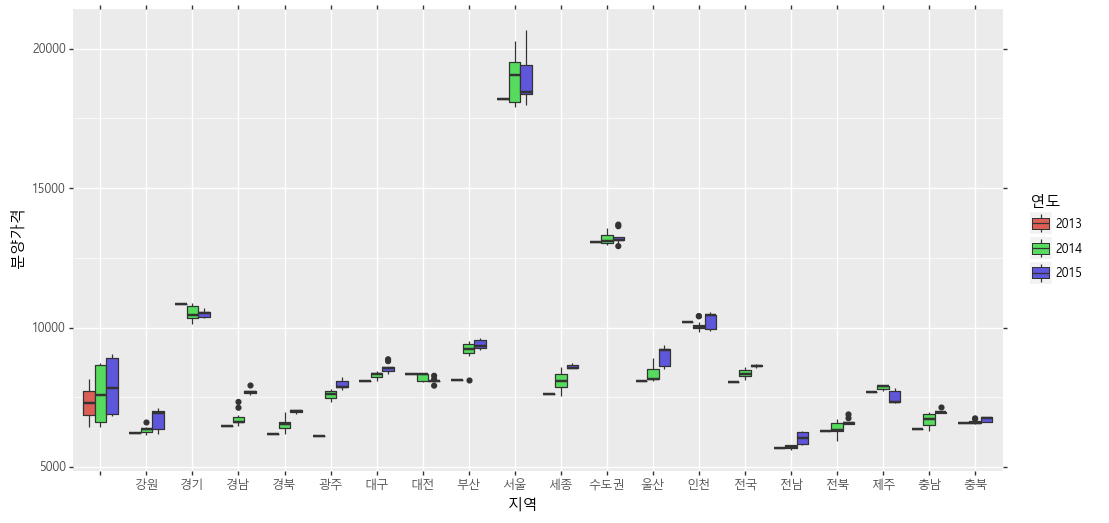

<ggplot: (-9223371869628930020)>

In [240]:
(ggplot(df_2013_2015, aes(x='지역', y='분양가격', fill='연도'))
 + geom_boxplot()
 + theme(text=element_text(family=font_f),
         figure_size=(12, 6))
)

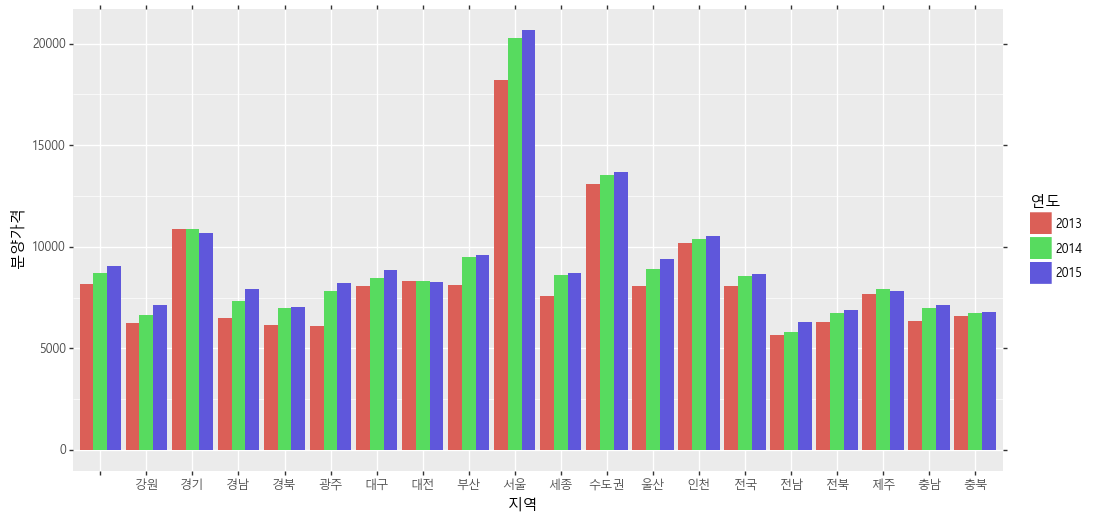

<ggplot: (-9223371869631007516)>

In [241]:
(ggplot(df_2013_2015, aes(x='지역', y='분양가격', fill='연도'))
 + geom_bar(stat='identity', position='dodge')
 + theme(text=element_text(family=font_f),
         figure_size=(12, 6))
)

In [243]:
df_2015_2018 = apt.loc[apt['규모구분'] == '전체']
print(df_2015_2018.shape)
df_2015_2018.head()

(578, 7)


,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3
5,인천,전체,2015,10,3163,3163.0,10437.9
10,경기,전체,2015,10,3138,3138.0,10355.4
15,부산,전체,2015,10,3112,3112.0,10269.6
20,대구,전체,2015,10,2682,2682.0,8850.6


In [244]:
df_2013_2015.columns

Index(['지역', '기간', '분양가', '연도', '월', '분양가격'], dtype='object')

In [245]:
df_2013_2015_prepare = df_2013_2015[['지역', '연도', '월', '분양가격']]
df_2013_2015_prepare.head()

,지역,연도,월,분양가격
0,전국,2013,,8059
1,서울,2013,,18189
2,부산,2013,,8111
3,대구,2013,,8080
4,인천,2013,,10204


In [246]:
df_2013_2015_prepare.columns = ['지역명', '연도', '월', '평당분양가격']

In [247]:
df_2015_2018.columns

Index(['지역명', '규모구분', '연도', '월', '분양가격(㎡)', '분양가격', '평당분양가격'], dtype='object')

In [248]:
df_2015_2018_prepare = df_2015_2018[['지역명', '연도', '월', '평당분양가격']]
df_2015_2018_prepare.head()

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3
5,인천,2015,10,10437.9
10,경기,2015,10,10355.4
15,부산,2015,10,10269.6
20,대구,2015,10,8850.6


In [249]:
df_2015_2018_prepare.describe()

,평당분양가격
count,561.000000
mean,9728.811765
std,3367.381716
min,6299.700000
25%,7497.600000
50%,8972.700000
75%,10560.000000
max,22832.700000


In [251]:
df_2013_2018 = pd.concat([df_2013_2015_prepare, df_2015_2018_prepare])
df_2013_2018.shape

(1040, 4)

In [252]:
df_2013_2018.head()

,지역명,연도,월,평당분양가격
0,전국,2013,,8059.0
1,서울,2013,,18189.0
2,부산,2013,,8111.0
3,대구,2013,,8080.0
4,인천,2013,,10204.0


In [253]:
df_2013_2018.tail()

,지역명,연도,월,평당분양가격
2865,전북,2018,7,7698.9
2870,전남,2018,7,7778.1
2875,경북,2018,7,8824.2
2880,경남,2018,7,8896.8
2885,제주,2018,7,11002.2


In [254]:
df_2013_2015_region= df_2013_2015_prepare['지역명'].unique()
df_2013_2015_region

array(['전국', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '', '경기', '수도권',
       '세종', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [255]:
df_2015_2018_region = df_2015_2018_prepare['지역명'].unique()
df_2015_2018_region

array(['서울', '인천', '경기', '부산', '대구', '광주', '대전', '울산', '세종', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [256]:
exclude_region = [region for region in df_2013_2015_region if not region in df_2015_2018_region] 
exclude_region

['전국', '', '수도권']

In [257]:
df_2013_2018.shape

(1040, 4)

In [258]:
df_2013_2018.loc[df_2013_2018['지역명'].str.match('전국|수도권')].head()

,지역명,연도,월,평당분양가격
0,전국,2013,,8059.0
10,수도권,2013,,13083.0
21,전국,2014,,8130.0
31,수도권,2014,,12995.0
42,전국,2014,,8195.0


In [259]:
df_2013_2018.drop(df_2013_2018.loc[df_2013_2018['지역명'].str.match('전국|수도권')].index, axis=0, inplace=True)
df_2013_2018.drop(df_2013_2018.loc[df_2013_2018['지역명'] == ''].index, axis=0, inplace=True)

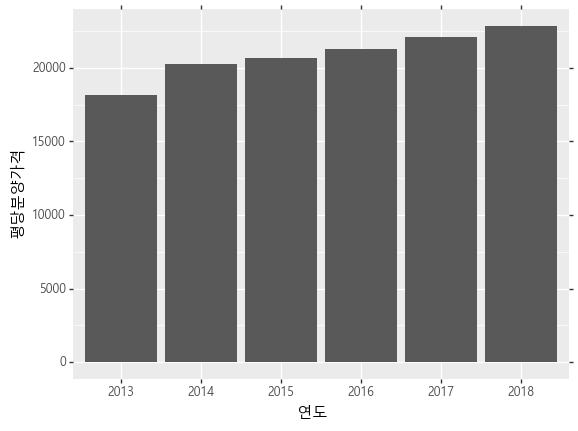

<ggplot: (-9223371869631000688)>

In [261]:
(ggplot(df_2013_2018, aes(x='연도', y='평당분양가격'))
 + geom_bar(stat='identity', position='dodge')
 + theme(text=element_text(family=font_f))
)

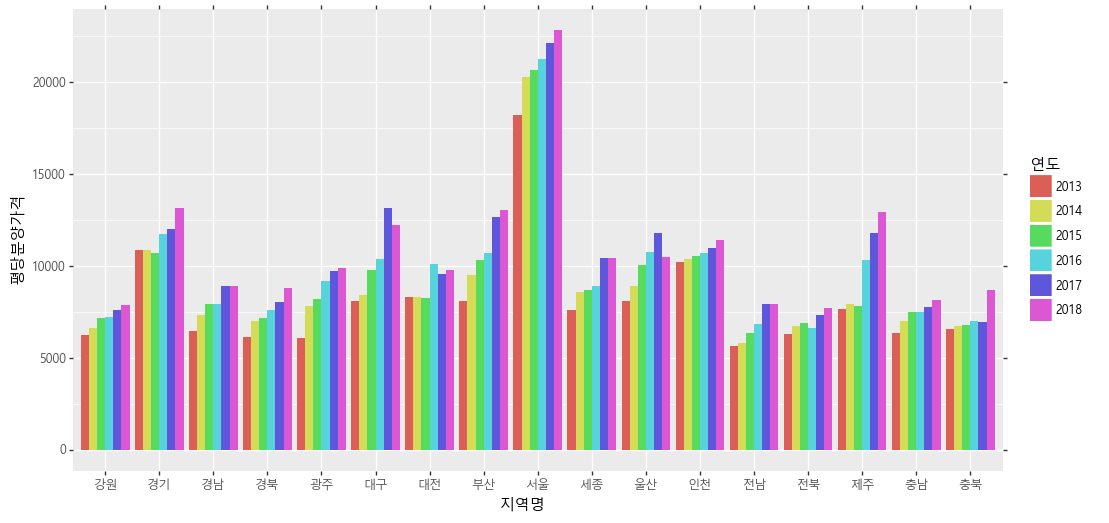

<ggplot: (-9223371869623101192)>

In [263]:
(ggplot(df_2013_2018, aes(x='지역명', y='평당분양가격', fill='연도'))
 + geom_bar(stat='identity', position='dodge')
 + theme(text=element_text(family=font_f),
         figure_size=(12, 6))
)

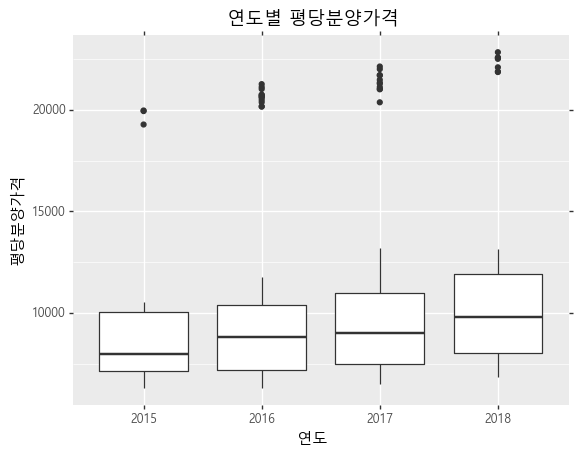

<ggplot: (-9223371869622458216)>

In [265]:
(ggplot(df_2015_2018_prepare)
 + aes(x='연도', y='평당분양가격')
 + ggtitle('연도별 평당분양가격')
 + geom_boxplot()
 + theme(text=element_text(family=font_f))
)

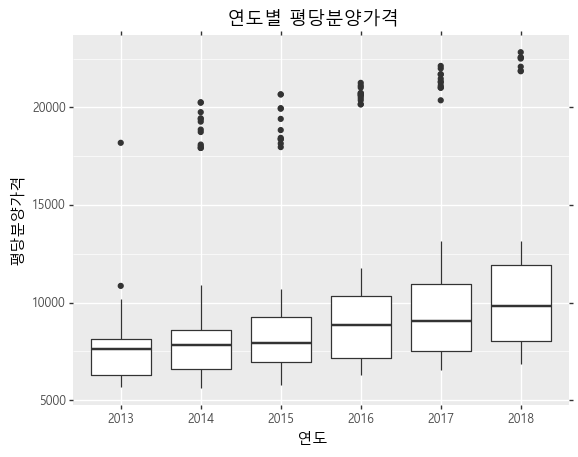

<ggplot: (-9223371869621817064)>

In [266]:
(ggplot(df_2013_2018)
 + aes(x='연도', y='평당분양가격')
 + ggtitle('연도별 평당분양가격')
 + geom_boxplot()
 + theme(text=element_text(family=font_f))
)

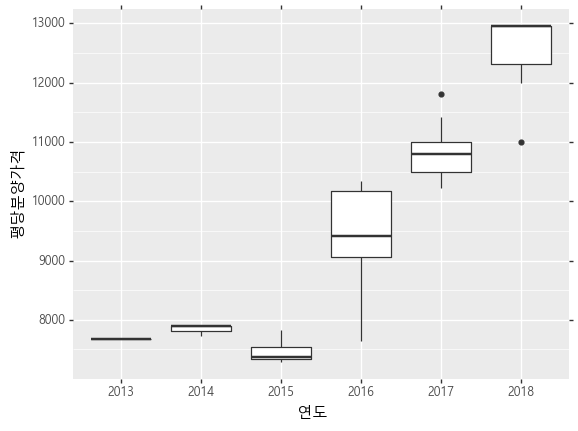

<ggplot: (-9223371869622449360)>

In [267]:
df_2013_2018_jeju = df_2013_2018.loc[df_2013_2018['지역명'] == '제주']
(ggplot(df_2013_2018_jeju)
 + aes(x='연도', y='평당분양가격')
 + geom_boxplot()
 + theme(text=element_text(family=font_f))
)

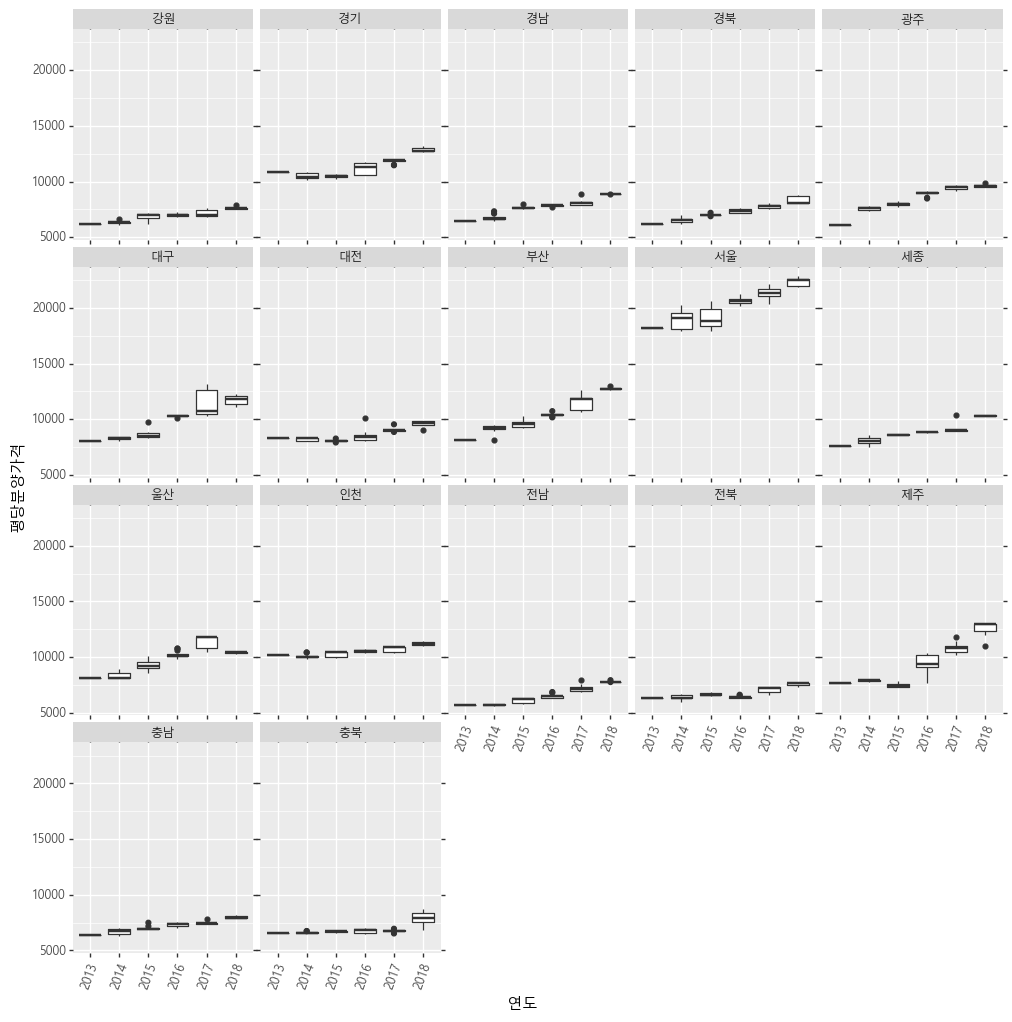

<ggplot: (-9223371869753203912)>

In [269]:
(ggplot(df_2013_2018)
 + aes(x='연도', y='평당분양가격')
 + geom_boxplot()
 + facet_wrap('지역명')
 + theme(text=element_text(family=font_f),
         axis_text_x=element_text(rotation=70),
         figure_size=(12, 12))
)